### Importación de librerías

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Carga del dataset
df = pd.read_csv(r"winequality-red.csv", sep=";")

In [39]:
#Verificación del dataset
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [40]:
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
801,8.6,0.550,0.09,3.3,0.068,8.0,17.0,0.99735,3.23,0.44,10.00,5
119,7.0,0.690,0.08,1.8,0.097,22.0,89.0,0.99590,3.34,0.54,9.20,6
871,6.9,0.560,0.03,1.5,0.086,36.0,46.0,0.99522,3.53,0.57,10.60,5
767,7.5,0.600,0.32,2.7,0.103,13.0,98.0,0.99938,3.45,0.62,9.50,5
1565,6.7,0.670,0.02,1.9,0.061,26.0,42.0,0.99489,3.39,0.82,10.90,6
1057,7.6,0.420,0.25,3.9,0.104,28.0,90.0,0.99784,3.15,0.57,9.10,5
1456,6.0,0.540,0.06,1.8,0.050,38.0,89.0,0.99236,3.30,0.50,10.55,6
313,8.6,0.470,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.40,5
363,12.5,0.460,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.20,5
408,10.4,0.340,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.30,6


### Analisis exploratorio de los datos

In [41]:
#Visualización del shape
print(f"Shape de los datos: {df.shape}")

Shape de los datos: (1599, 12)


In [42]:
#Visualización de los tipos de datos del df
print("Tipos de datos:")
df.dtypes

Tipos de datos:


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [43]:
#Separación del dataset
x = df.drop(["quality"], axis=1)
y = df["quality"]

In [44]:
#Obtención del set de entrenamiento y prueba
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=00000)

### Generación del modelo y entrenamiento

In [45]:
from sklearn.ensemble import RandomForestClassifier

#Creación del modelo
rf = RandomForestClassifier(n_estimators=30, 
                            random_state=00000, 
                            max_depth=3, 
                            criterion="gini", 
                            max_features="sqrt")

In [46]:
#Entrenamiento
rf.fit(x_train, y_train)

#Obtención de las predicciones
y_train_pred = rf.predict(x_train)
y_test_pred = rf.predict(x_test)

### Evalucación del modelo

In [47]:
from sklearn.metrics import classification_report

#Reporte con datos de entrenamiento
print("Reporte de clasificación de entrenamiento:")
print(classification_report(y_train, y_train_pred))

#Reporte con datos de testeo
print("Reporte de clasificación de testeo:")
print(classification_report(y_test, y_test_pred))

Reporte de clasificación de entrenamiento:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        38
           5       0.69      0.77      0.73       473
           6       0.55      0.70      0.61       434
           7       0.83      0.19      0.32       154
           8       0.00      0.00      0.00        13

    accuracy                           0.62      1119
   macro avg       0.34      0.28      0.28      1119
weighted avg       0.62      0.62      0.59      1119

Reporte de clasificación de testeo:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.69      0.75      0.72       208
           6       0.60      0.69      0.64       204
           7       0.56      0.22      0.32        45
           8       0.00      0.00      0.00         5

c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'alcohol'),
  Text(1, 0, 'sulphates'),
  Text(2, 0, 'volatile acidity'),
  Text(3, 0, 'total sulfur dioxide'),
  Text(4, 0, 'citric acid'),
  Text(5, 0, 'density'),
  Text(6, 0, 'fixed acidity'),
  Text(7, 0, 'pH'),
  Text(8, 0, 'chlorides'),
  Text(9, 0, 'residual sugar'),
  Text(10, 0, 'free sulfur dioxide')])

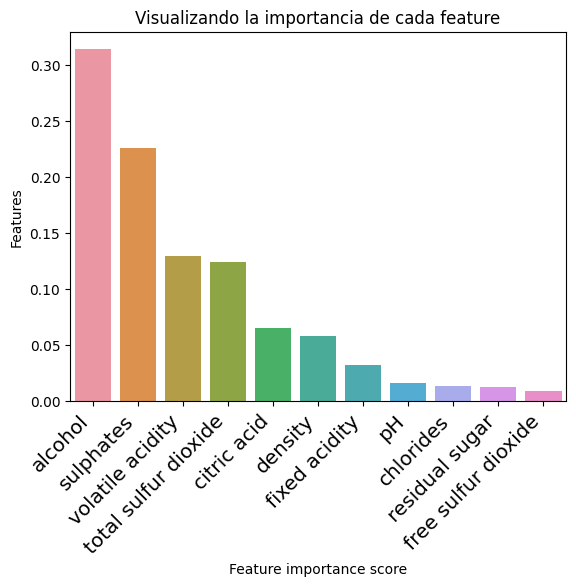

In [48]:
#Visualización de los features principales
feature_importances_df = pd.DataFrame(
    {"feature": list(x.columns),"importance": rf.feature_importances_}
    ).sort_values("importance", ascending=False)

sns.barplot(x=feature_importances_df.feature, y=feature_importances_df.importance)
plt.xlabel("Feature importance score")
plt.ylabel("Features")
plt.title("Visualizando la importancia de cada feature")
plt.xticks(rotation=45, horizontalalignment="right", fontweight="light", fontsize="x-large")

### Tuning de los hiperparametros

In [49]:
from sklearn.model_selection import GridSearchCV

#Creación del grid para la selección de hiperparametros
param_grid = {
    'max_depth':[i for i in range(3,6)],
    'max_features':['log2','sqrt'],
    'min_samples_leaf':[1,2,3,4],
    'n_estimators':[i for i in range(8,29)]
}

In [50]:
#Busqueda de huperparámetros
rf_random = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    verbose=1,
    n_jobs=-1
    )

#Muestra de los mejores hiperparámetros
rf_random.fit(x_train,y_train)
rf_random.best_params_
print(rf_random.best_params_)

#Creación de un grid con esos valores
best_grid = rf_random.best_estimator_

Fitting 5 folds for each of 504 candidates, totalling 2520 fits
{'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 4, 'n_estimators': 27}


In [52]:
#Obtención de las predicciones
best_y_train_pred = best_grid.predict(x_train)
best_y_test_pred = best_grid.predict(x_test)

#Reporte con datos de entrenamiento
print("Reporte de clasificación de entrenamiento:")
print(classification_report(y_train, best_y_train_pred))

#Reporte con datos de testeo
print("Reporte de clasificación de testeo:")
print(classification_report(y_test, best_y_test_pred))

Reporte de clasificación de entrenamiento:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        38
           5       0.72      0.80      0.76       473
           6       0.62      0.72      0.67       434
           7       0.83      0.48      0.61       154
           8       0.00      0.00      0.00        13

    accuracy                           0.68      1119
   macro avg       0.36      0.33      0.34      1119
weighted avg       0.66      0.68      0.66      1119

Reporte de clasificación de testeo:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        15
           5       0.71      0.77      0.74       208
           6       0.63      0.67      0.65       204
           7       0.46      0.36      0.40        45
           8       0.00      0.00      0.00         5

c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kevin\Desktop\Cursos\arbolesDecision\venv\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m